In [2]:
import pandas as pd


# Load "mpd2020.xlsx" (Historical GDP and Population Data)
mpd_df = pd.read_excel(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\mpd2020.xlsx", sheet_name="Full data")

# Load "FeedGrains.csv" (Agricultural Data)
feedgrains_df = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\FeedGrains.csv", header=None)

# Load "owid-co2-data.csv" (CO₂ Data)
co2_df = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\owid-co2-data.csv")

# === Assign Column Names to FeedGrains Dataset ===
feedgrains_df.columns = ["col1", "category", "col3", "commodity", "col5", "col6", 
                         "country", "col8", "col9", "col10", "metric", "col12", 
                         "unit", "year", "col15", "period", "col17", "market_type", 
                         "yield"]

# === Filter Relevant Columns from CO2 Dataset ===
co2_df_filtered = co2_df[["country", "year", "co2", "co2_per_capita", "population", "gdp"]]

# === Merge Datasets ===

# Step 1: Merge MPD with FeedGrains using left join (keep all from MPD)
combined_df = pd.merge(feedgrains_df, mpd_df, on=["country", "year"], how="left")

# Step 2: Merge with CO2 data using left join (still preserving MPD as base)
final_combined_df = pd.merge(combined_df, co2_df_filtered, on=["country", "year"], how="left")

# === Save the Final Dataset (Without Dropping NaNs) ===
final_combined_df.to_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\data.csv", index=False)

# === Display Some Info ===
print(f"Number of entries in MPD (base dataset): {len(mpd_df)}")
print(f"Number of entries in final combined dataset: {len(final_combined_df)}")
print(final_combined_df.head())



C:\Users\Admin\AppData\Local\Temp\ipykernel_8748\1546133386.py:8: DtypeWarning: Columns (0,2,4,5,7,9,11,13,14,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  feedgrains_df = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\FeedGrains.csv", header=None)


Number of entries in MPD (base dataset): 21682
Number of entries in final combined dataset: 524369
          col1        category               col3            commodity  \
0  SC_Group_ID   SC_Group_Desc  SC_GroupCommod_ID  SC_GroupCommod_Desc   
1            2  Supply and use                  9               Barley   
2            2  Supply and use                  9               Barley   
3            2  Supply and use                  9               Barley   
4            2  Supply and use                  9               Barley   

              col5       col6                    country             col8  \
0  SC_Geography_ID  SortOrder  SC_GeographyIndented_Desc  SC_Commodity_ID   
1                1      0.800              United States                1   
2                1      0.800              United States                1   
3                1      0.800              United States                1   
4                1      0.800              United States               

In [3]:
print(final_combined_df.columns)
print(len(final_combined_df.columns))

Index(['col1', 'category', 'col3', 'commodity', 'col5', 'col6', 'country',
       'col8', 'col9', 'col10', 'metric', 'col12', 'unit', 'year', 'col15',
       'period', 'col17', 'market_type', 'yield', 'countrycode', 'gdppc',
       'pop', 'co2', 'co2_per_capita', 'population', 'gdp'],
      dtype='object')
26


In [4]:
# Rename the columns in the final combined dataset
final_combined_df.columns = ['SC_Group_ID', 'SC_Group_Desc', 'SC_GroupCommod_ID', 'SC_GroupCommod_Desc', 
                            'SC_Geography_ID', 'SortOrder', 'SC_GeographyIndented_Desc', 'SC_Commodity_ID', 
                            'SC_Commodity_Desc', 'SC_Attribute_ID', 'SC_Attribute_Desc', 'SC_Unit_ID', 
                            'SC_Unit_Desc', 'Year_ID', 'SC_Frequency_ID', 'SC_Frequency_Desc', 'Timeperiod_ID', 
                            'Timeperiod_Desc', 'Amount', 'countrycode', 'gdppc', 'pop', 'co2', 'co2_per_capita', 
                            'population', 'gdp']
# Drop the second row of the final combined dataset
final_combined_df.drop(0, inplace=True)
print(final_combined_df)

       SC_Group_ID        SC_Group_Desc SC_GroupCommod_ID SC_GroupCommod_Desc  \
1                2       Supply and use                 9              Barley   
2                2       Supply and use                 9              Barley   
3                2       Supply and use                 9              Barley   
4                2       Supply and use                 9              Barley   
5                2       Supply and use                 9              Barley   
...            ...                  ...               ...                 ...   
524364           3  Exports and imports                17                Oats   
524365           3  Exports and imports                17                Oats   
524366           3  Exports and imports                17                Oats   
524367           3  Exports and imports                17                Oats   
524368           3  Exports and imports                17                Oats   

       SC_Geography_ID Sort

In [5]:
# Check whether the second row is deleted
print(final_combined_df.head())

  SC_Group_ID   SC_Group_Desc SC_GroupCommod_ID SC_GroupCommod_Desc  \
1           2  Supply and use                 9              Barley   
2           2  Supply and use                 9              Barley   
3           2  Supply and use                 9              Barley   
4           2  Supply and use                 9              Barley   
5           2  Supply and use                 9              Barley   

  SC_Geography_ID SortOrder SC_GeographyIndented_Desc SC_Commodity_ID  \
1               1     0.800             United States               1   
2               1     0.800             United States               1   
3               1     0.800             United States               1   
4               1     0.800             United States               1   
5               1     0.800             United States               1   

  SC_Commodity_Desc SC_Attribute_ID  ... Timeperiod_ID        Timeperiod_Desc  \
1            Barley               3  ...            6

In [6]:
print(final_combined_df.describe())

              gdppc            pop           co2  co2_per_capita  \
count  31589.000000   31589.000000  51251.000000    51251.000000   
mean   37747.862363  255134.016288  12925.174443       14.061992   
std    12293.484117   55877.009265  12151.935762        6.948945   
min     4599.876800   36869.000000     59.232000        1.627000   
25%    29611.000000  227726.463000   4941.708000        4.739000   
50%    38807.280000  263662.439000   5546.116000       16.852000   
75%    49266.915900  298988.427100  24258.168000       20.228000   
max    55334.739400  327834.658300  37791.570000       22.257000   

         population           gdp  
count  5.125100e+04  3.936300e+04  
mean   2.311759e+09  2.300593e+13  
std    3.037641e+09  3.301074e+13  
min    3.641407e+07  1.695929e+11  
25%    2.506750e+08  7.581108e+12  
50%    3.080235e+08  1.294742e+13  
75%    5.842056e+09  1.693763e+13  
max    8.091735e+09  1.301126e+14  


In [7]:
print(final_combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524368 entries, 1 to 524368
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SC_Group_ID                524368 non-null  object 
 1   SC_Group_Desc              524368 non-null  object 
 2   SC_GroupCommod_ID          516928 non-null  object 
 3   SC_GroupCommod_Desc        516928 non-null  object 
 4   SC_Geography_ID            524368 non-null  object 
 5   SortOrder                  524368 non-null  object 
 6   SC_GeographyIndented_Desc  524368 non-null  object 
 7   SC_Commodity_ID            524368 non-null  object 
 8   SC_Commodity_Desc          524368 non-null  object 
 9   SC_Attribute_ID            524368 non-null  object 
 10  SC_Attribute_Desc          524368 non-null  object 
 11  SC_Unit_ID                 524368 non-null  object 
 12  SC_Unit_Desc               524368 non-null  object 
 13  Year_ID                    52

In [8]:
print(final_combined_df.isnull().sum())

SC_Group_ID                       0
SC_Group_Desc                     0
SC_GroupCommod_ID              7440
SC_GroupCommod_Desc            7440
SC_Geography_ID                   0
SortOrder                         0
SC_GeographyIndented_Desc         0
SC_Commodity_ID                   0
SC_Commodity_Desc                 0
SC_Attribute_ID                   0
SC_Attribute_Desc                 0
SC_Unit_ID                        0
SC_Unit_Desc                      0
Year_ID                           0
SC_Frequency_ID                   0
SC_Frequency_Desc                 0
Timeperiod_ID                     0
Timeperiod_Desc                   0
Amount                            0
countrycode                  492779
gdppc                        492779
pop                          492779
co2                          473117
co2_per_capita               473117
population                   473117
gdp                          485005
dtype: int64


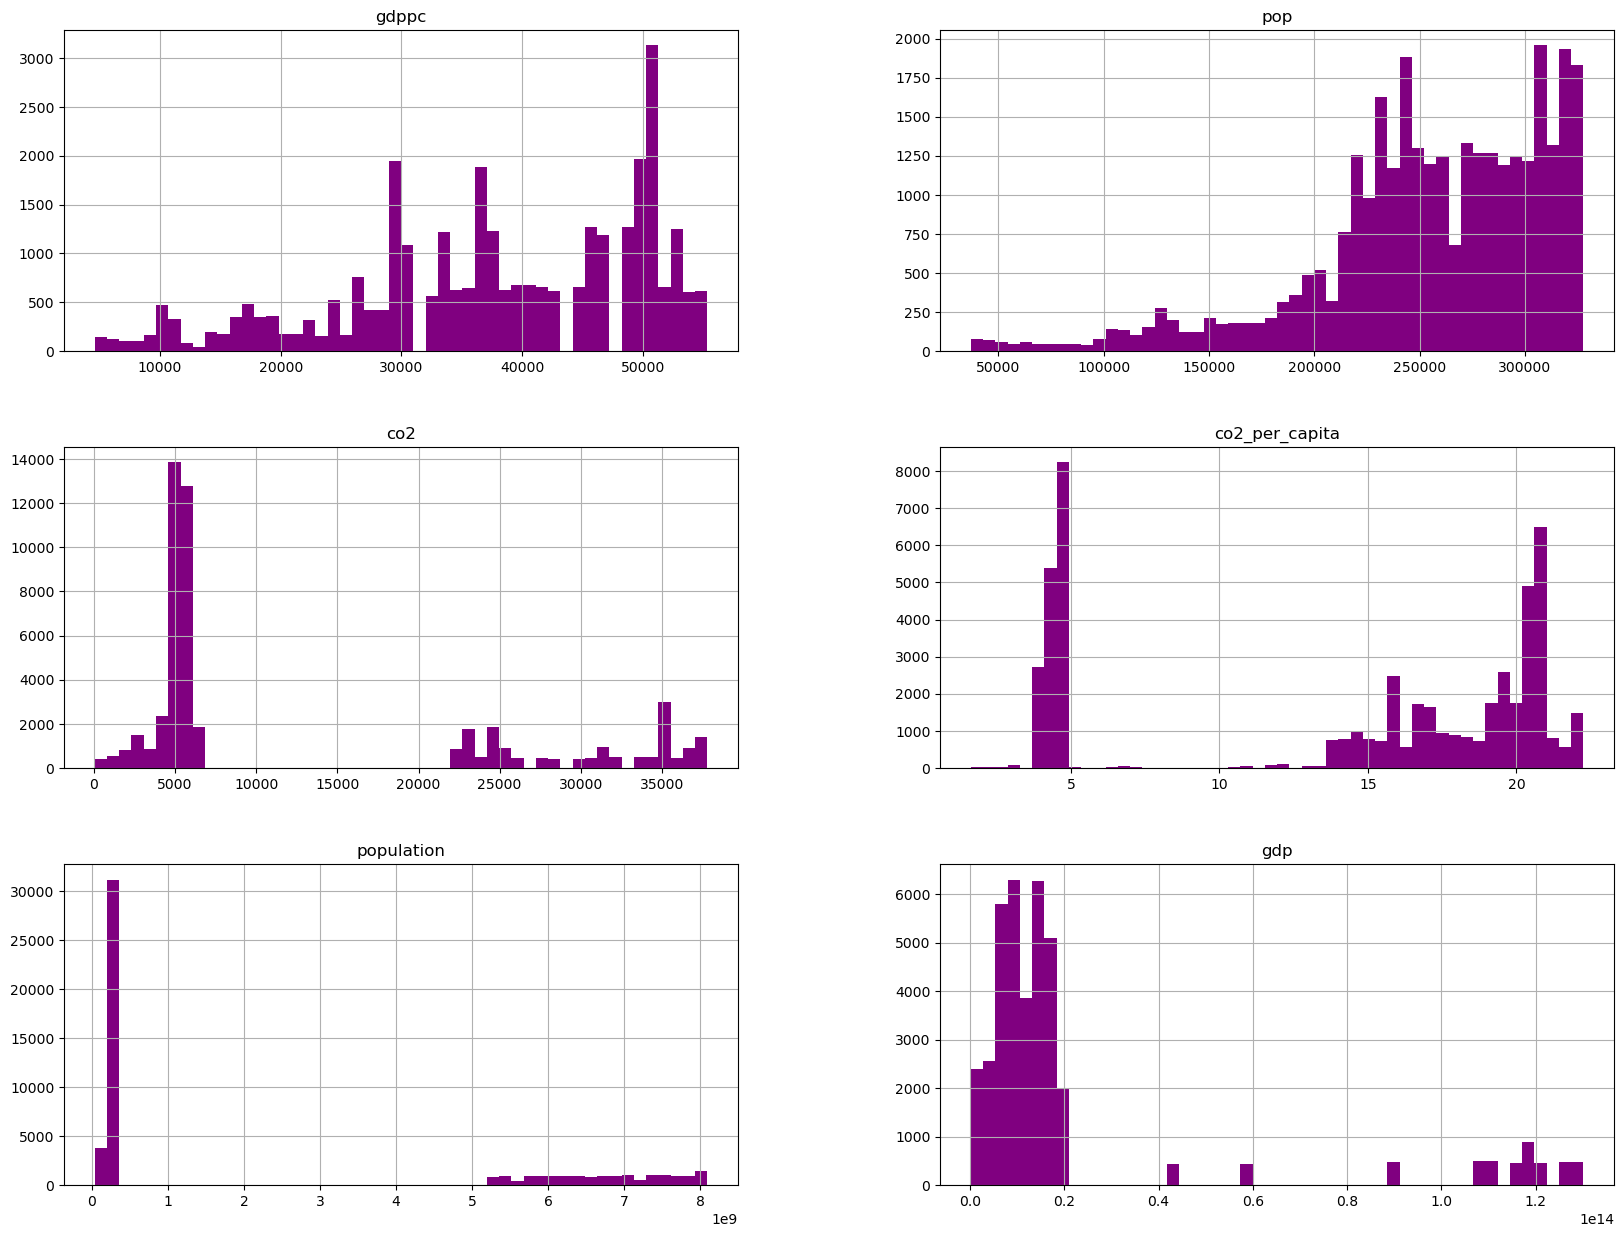

In [9]:
# Check whether there are any missing values in the final combined dataset and whether each column is skew or not. 
import matplotlib.pyplot as plt
final_combined_df.hist(bins=50, figsize=(20, 15), color='purple')
plt.show()

In [10]:
#check the minimum year and maximum year in the final combined dataset
year = final_combined_df['Year_ID'].astype(int)
print(year.min())
print(year.max())
# The intervals are as follows:
#1866 - 1886 as 0
#1887 - 1907 as 1
#1908 - 1928 as 2
#1929 - 1949 as 3
#1950 - 1970 as 4
#1971 - 1991 as 5
#1992 - 2012 as 6
#2013 - 2025 as 7

1866
2025


In [11]:
# Drop countrycode column which is not needed for the analysis
final_combined_df = final_combined_df.drop('countrycode', axis=1)

In [13]:
# Define the intervals and their corresponding column names
intervals = {
    '1866-1886': (1866, 1886),
    '1887-1907': (1887, 1907),
    '1908-1928': (1908, 1928),
    '1929-1949': (1929, 1949),
    '1950-1970': (1950, 1970),
    '1971-1991': (1971, 1991),
    '1992-2012': (1992, 2012),
    '2013-2025': (2013, 2025)
}

# Create one-hot encoded columns for each interval
for interval_name, (start, end) in intervals.items():
    final_combined_df[interval_name] = ((year >= start) & (year <= end)).astype(int)

final_combined_df.drop('Year_ID', axis=1, inplace=True)
print(final_combined_df.head())

  SC_Group_ID   SC_Group_Desc SC_GroupCommod_ID SC_GroupCommod_Desc  \
1           2  Supply and use                 9              Barley   
2           2  Supply and use                 9              Barley   
3           2  Supply and use                 9              Barley   
4           2  Supply and use                 9              Barley   
5           2  Supply and use                 9              Barley   

  SC_Geography_ID SortOrder SC_GeographyIndented_Desc SC_Commodity_ID  \
1               1     0.800             United States               1   
2               1     0.800             United States               1   
3               1     0.800             United States               1   
4               1     0.800             United States               1   
5               1     0.800             United States               1   

  SC_Commodity_Desc SC_Attribute_ID  ... population gdp 1866-1886 1887-1907  \
1            Barley               3  ...        NaN NaN

In [14]:
# Convert this dataset to a new CSV file
final_combined_df.to_csv(r"C:\Users\Admin\OneDrive\Documents\ASUOnline\DAT490\data_cleaned.csv", index=False)

In [28]:
final_combined_df.isnull().sum()

SC_Group_ID                       0
SC_Group_Desc                     0
SC_GroupCommod_ID              7440
SC_GroupCommod_Desc            7440
SC_Geography_ID                   0
SortOrder                         0
SC_GeographyIndented_Desc         0
SC_Commodity_ID                   0
SC_Commodity_Desc                 0
SC_Attribute_ID                   0
SC_Attribute_Desc                 0
SC_Unit_ID                        0
SC_Unit_Desc                      0
SC_Frequency_ID                   0
SC_Frequency_Desc                 0
Timeperiod_ID                     0
Timeperiod_Desc                   0
Amount                            0
gdppc                        492779
pop                          492779
co2                          473117
co2_per_capita               473117
population                   473117
gdp                          485005
1866-1886                         0
1887-1907                         0
1908-1928                         0
1929-1949                   

### EDA and Data Preprocessing Process

In [16]:
#Check the unique values in the 'countrycode' column
print(final_combined_df['SC_GeographyIndented_Desc'].unique())

['United States' '  World less U.S.' 'U.S. - Central IL'
 'U.S. - Gulf ports, LA' 'U.S. - Omaha, NE' 'U.S. - Chicago, IL'
 'U.S. - Kansas City, MO' 'U.S. - Toledo, OH' 'U.S. - Memphis, TN'
 'U.S. - Minneapolis, MN' 'World' 'U.S. - Midwest' 'U.S. - AR points'
 'U.S. - IL points, IL' 'U.S. - Central US' 'U.S. - AR'
 'U.S. - Domestic, East Coast' 'U.S. - New York, NY' '  Latin America'
 '      Central America' '      Caribbean' '      South America'
 '        European Union-15' '    Asia and Middle East'
 '      Middle East' '        South Asia' 'U.S. - Lawrenceburg, IN'
 'U.S. - St Louis, MO' '        Southeast Asia' '    Oceania'
 '      North Africa' '    Africa' '      Sub-Saharan Africa'
 '    Western Hemisphere' '      North America' '    Europe/Eurasia'
 '      European Union-25' '        Acceding-10' '      Asia'
 '      Other Europe' '      Former Soviet Union-12' '        East Asia'
 '        Canada' '        Greenland' '        Mexico' '        Guatemala'
 '        El Salvador'

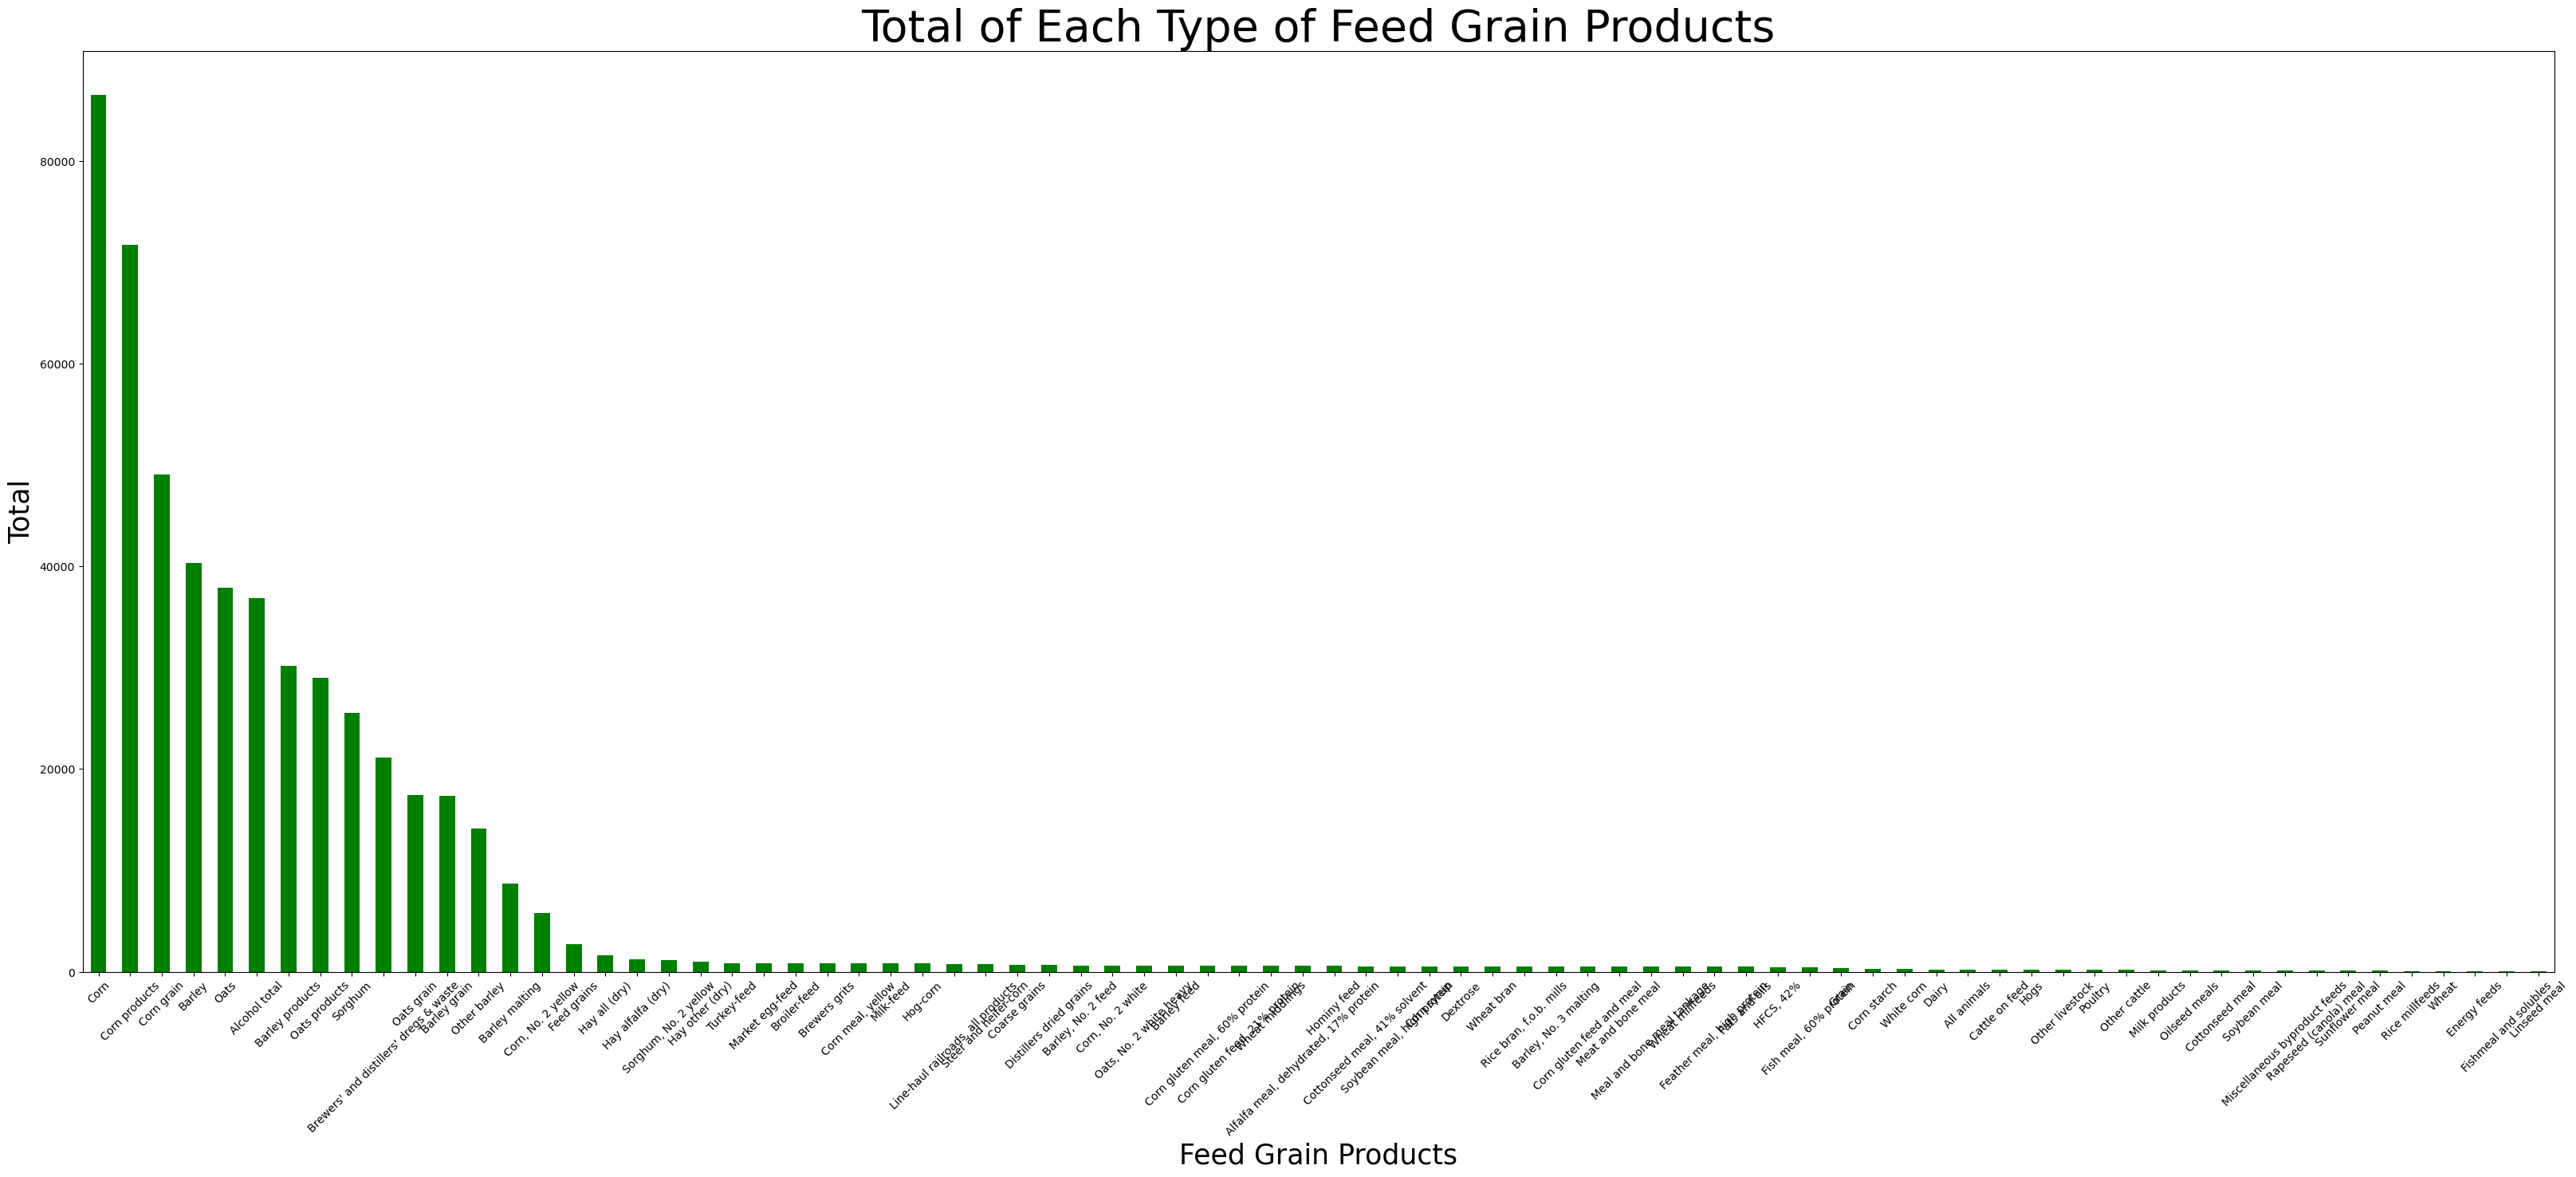

In [17]:
# Create histogram of the unique values of products in the 'SC_Commodity_Desc' column
final_combined_df['SC_Commodity_Desc'].value_counts().plot(kind='bar', figsize=(40, 15), color='green')
plt.title('Total of Each Type of Feed Grain Products', fontsize=40)
plt.xlabel('Feed Grain Products', fontsize=25)
plt.ylabel('Total', fontsize=25)
plt.xticks(rotation=45)
plt.show()

In [19]:
# Check unique values in the 'SC_Commodity_Desc' column and SC_GroupCommod_Desc column
print(final_combined_df['SC_Commodity_Desc'].unique())
print()
print(final_combined_df['SC_GroupCommod_Desc'].unique())

['Barley' 'Feed grains' 'Coarse grains' 'Hay alfalfa (dry)' 'Corn'
 'Hay other (dry)' 'Hay all (dry)' 'Corn grain' 'Oats' 'All animals'
 'Barley feed' 'Barley malting' 'Broiler-feed' 'Market egg-feed'
 'Steer and heifer-corn' 'Hog-corn' 'Milk-feed' 'Turkey-feed' 'Grain'
 'Line-haul railroads, all products' 'Corn gluten feed and meal'
 'Meal and bone meal tankage' 'Wheat millfeeds' 'Dairy' 'Cattle on feed'
 'Other cattle' 'Fats and oils' 'Poultry' 'Other livestock' 'Sorghum'
 'Corn, No. 2 yellow' 'Sorghum, No. 2 yellow' 'Distillers dried grains'
 'Soybean meal, high protein' 'Corn meal, yellow' 'Brewers grits'
 'Alfalfa meal, dehydrated, 17% protein' 'Corn, No. 2 white' 'Wheat bran'
 'Wheat middlings' 'Cottonseed meal, 41% solvent' 'Barley, No. 2 feed'
 'Oats, No. 2 white heavy' 'Barley, No. 3 malting' 'Corn syrup'
 'Feather meal, high protein' 'Hominy feed' 'Meat and bone meal'
 'Rice bran, f.o.b. mills' 'Fish meal, 60% protein' 'Barley grain'
 'Oats grain' 'Oats products' 'Other barle

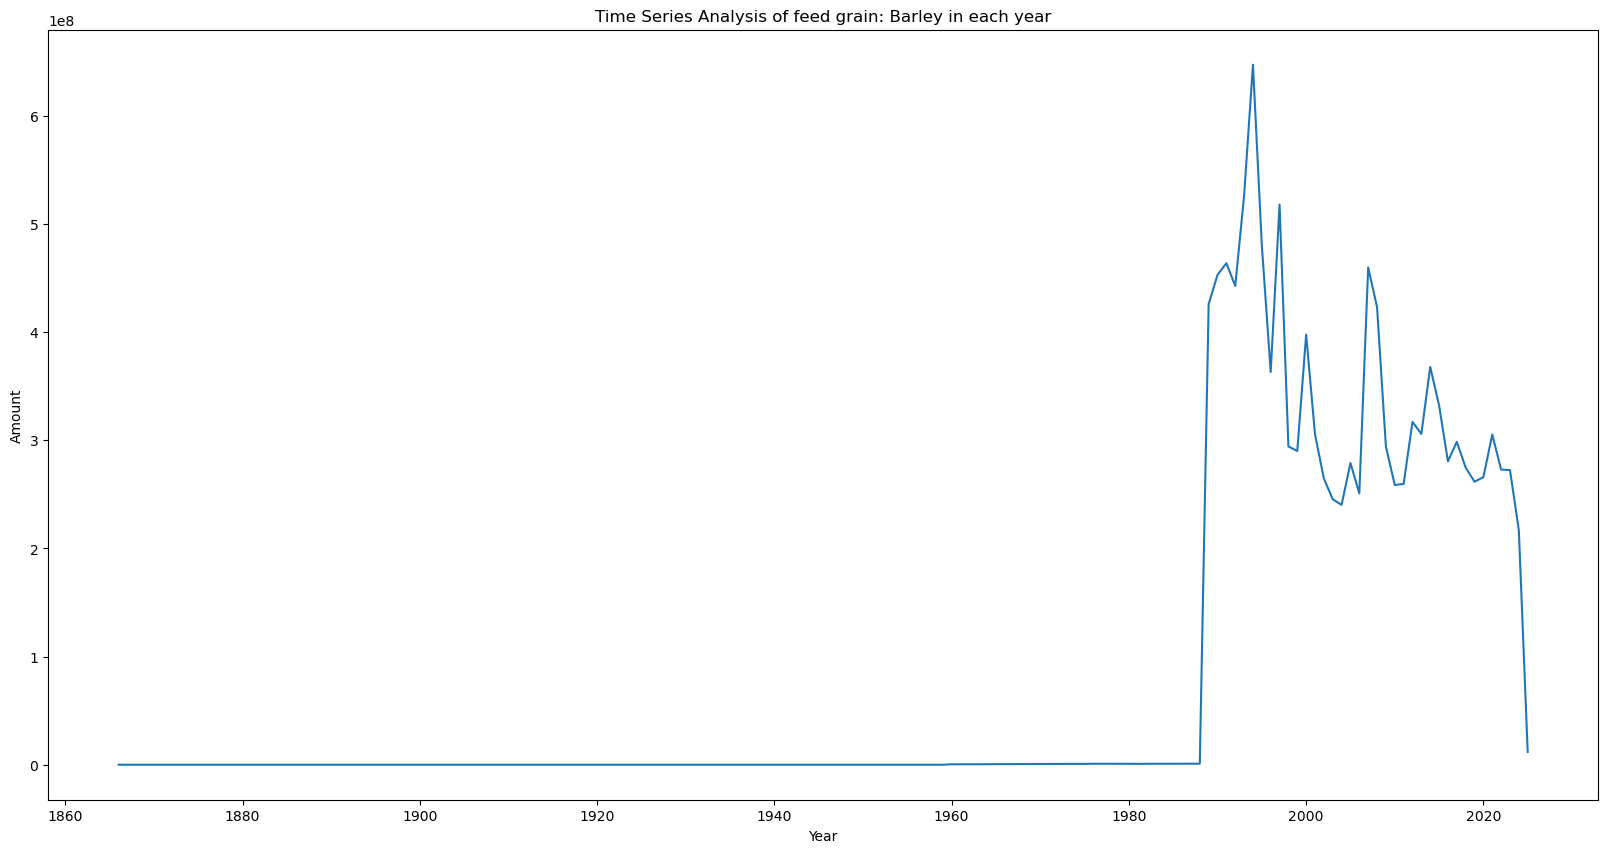

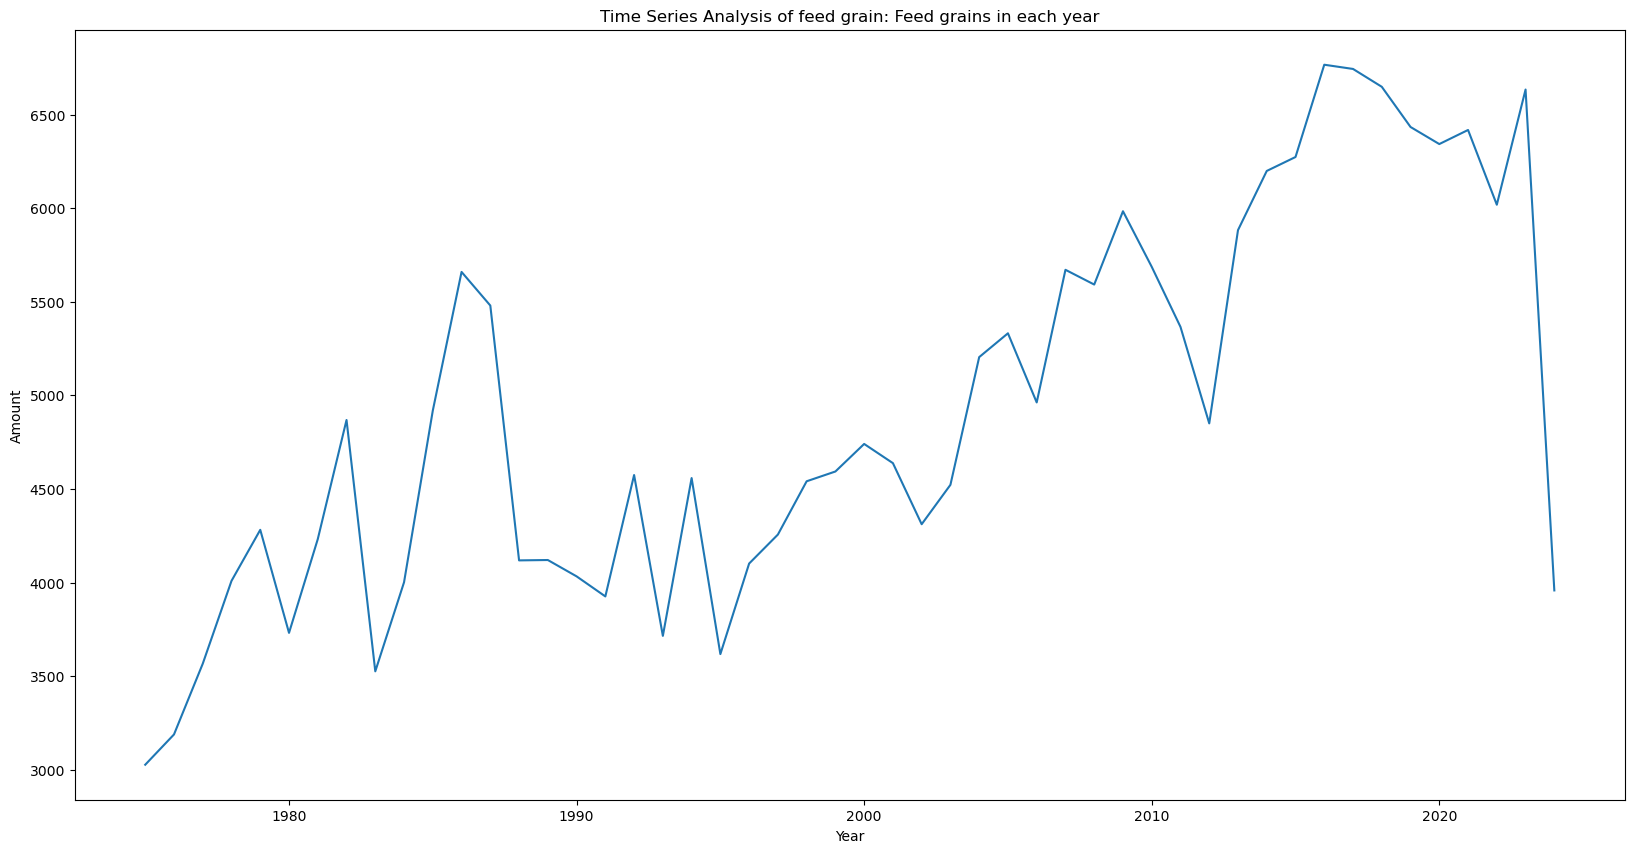

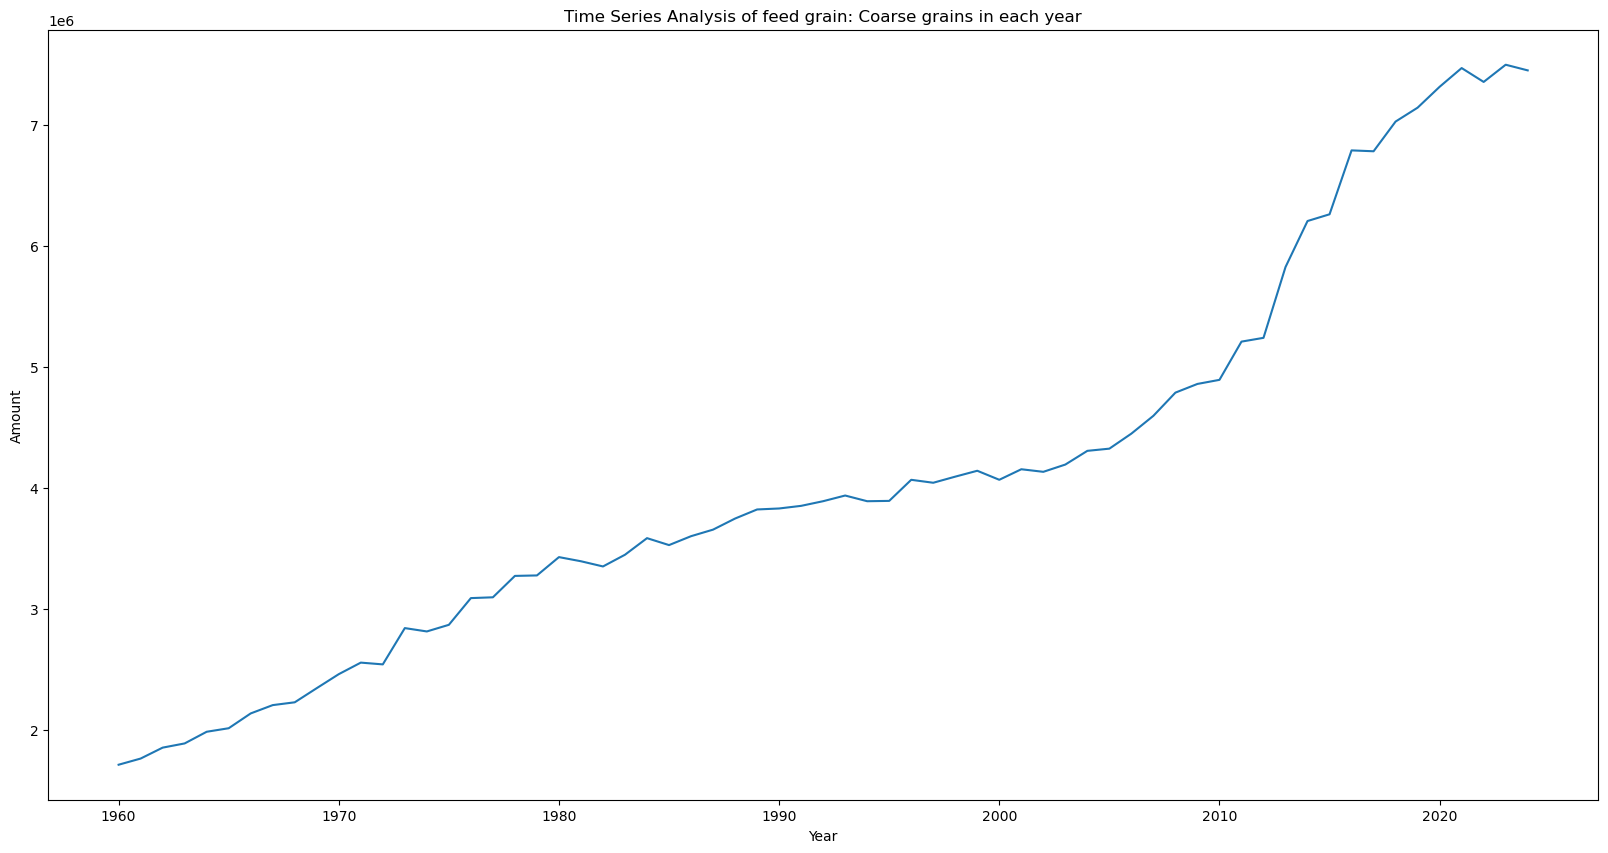

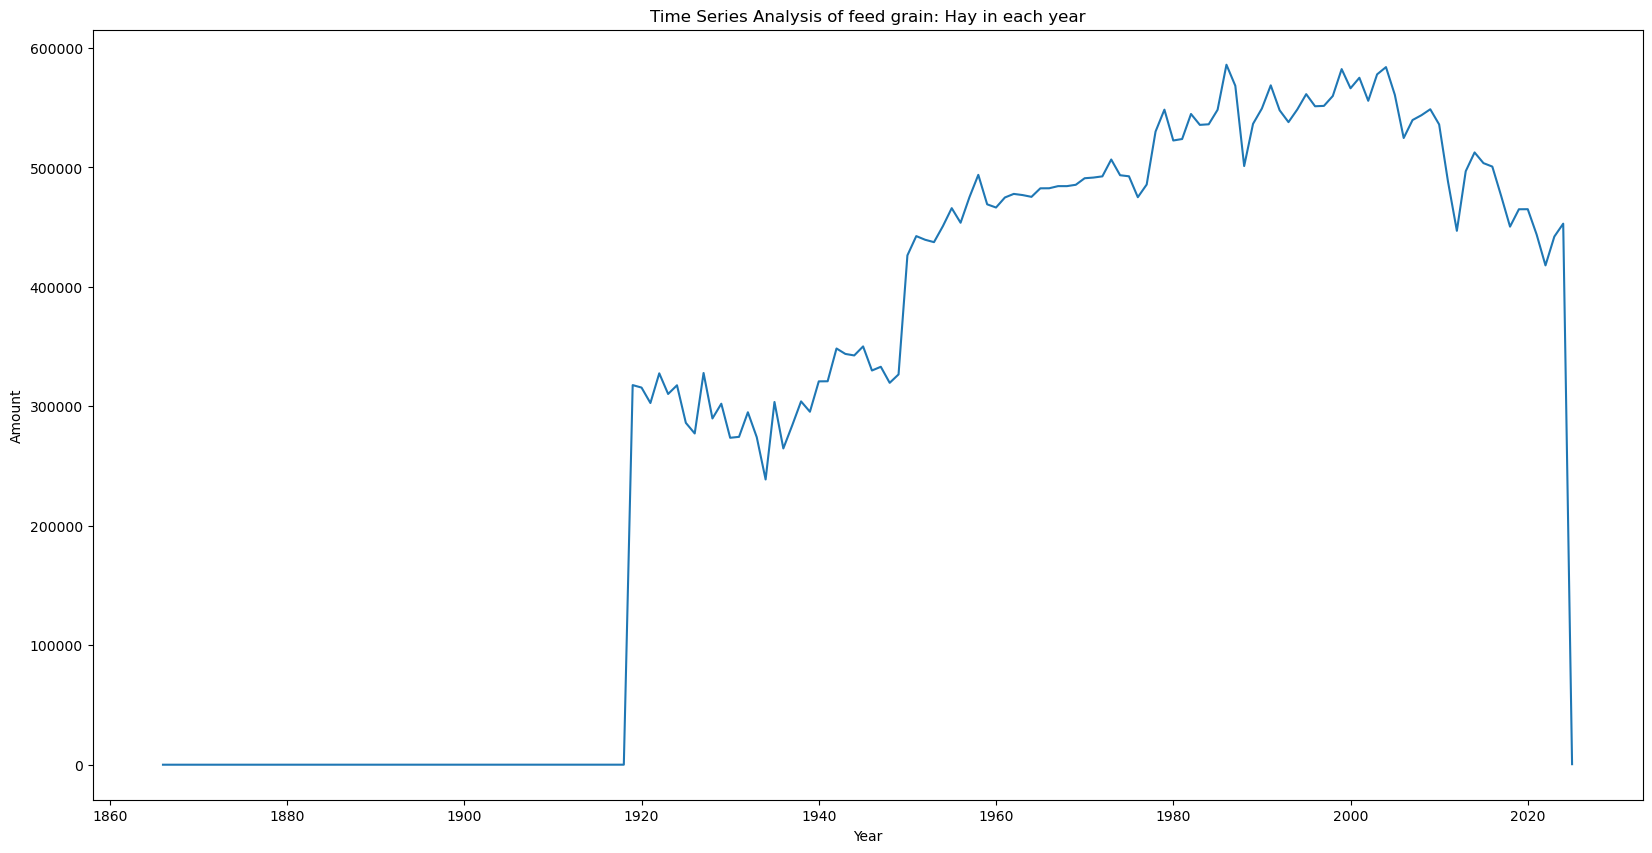

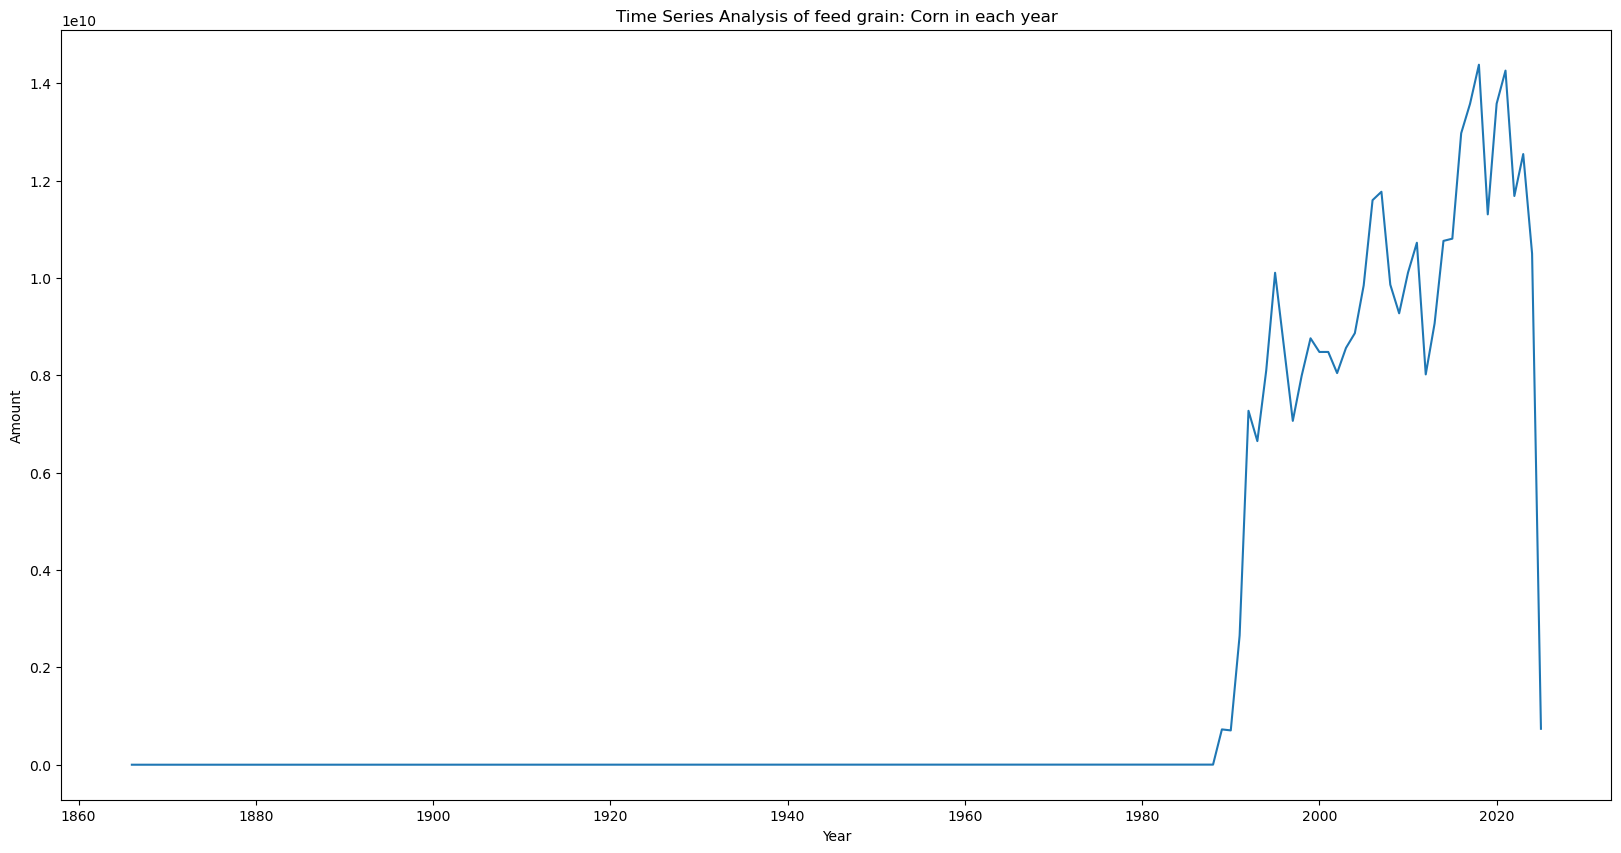

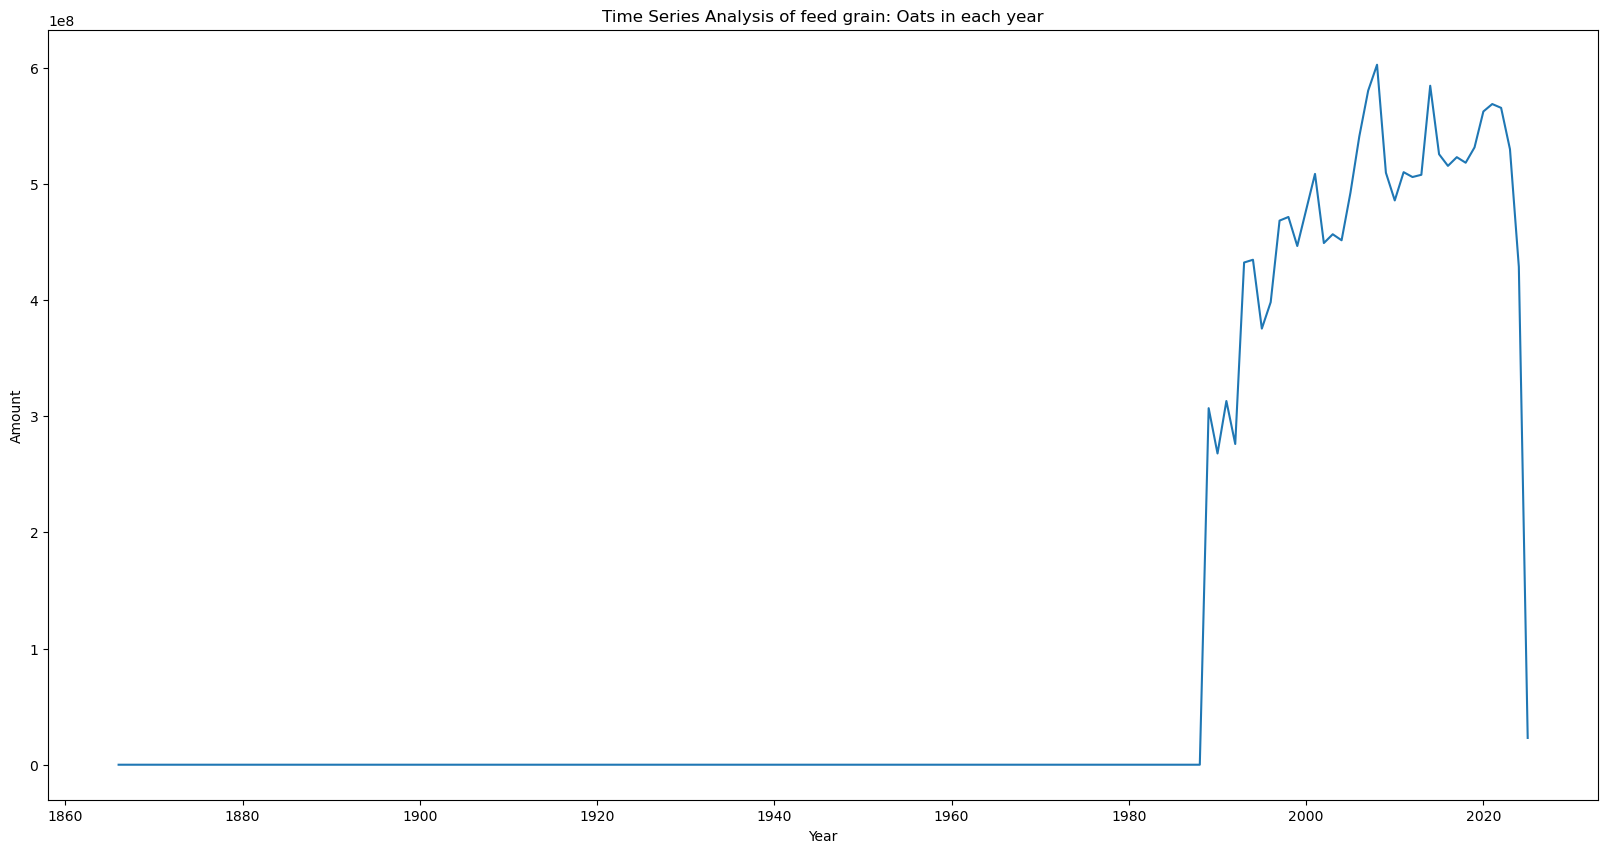

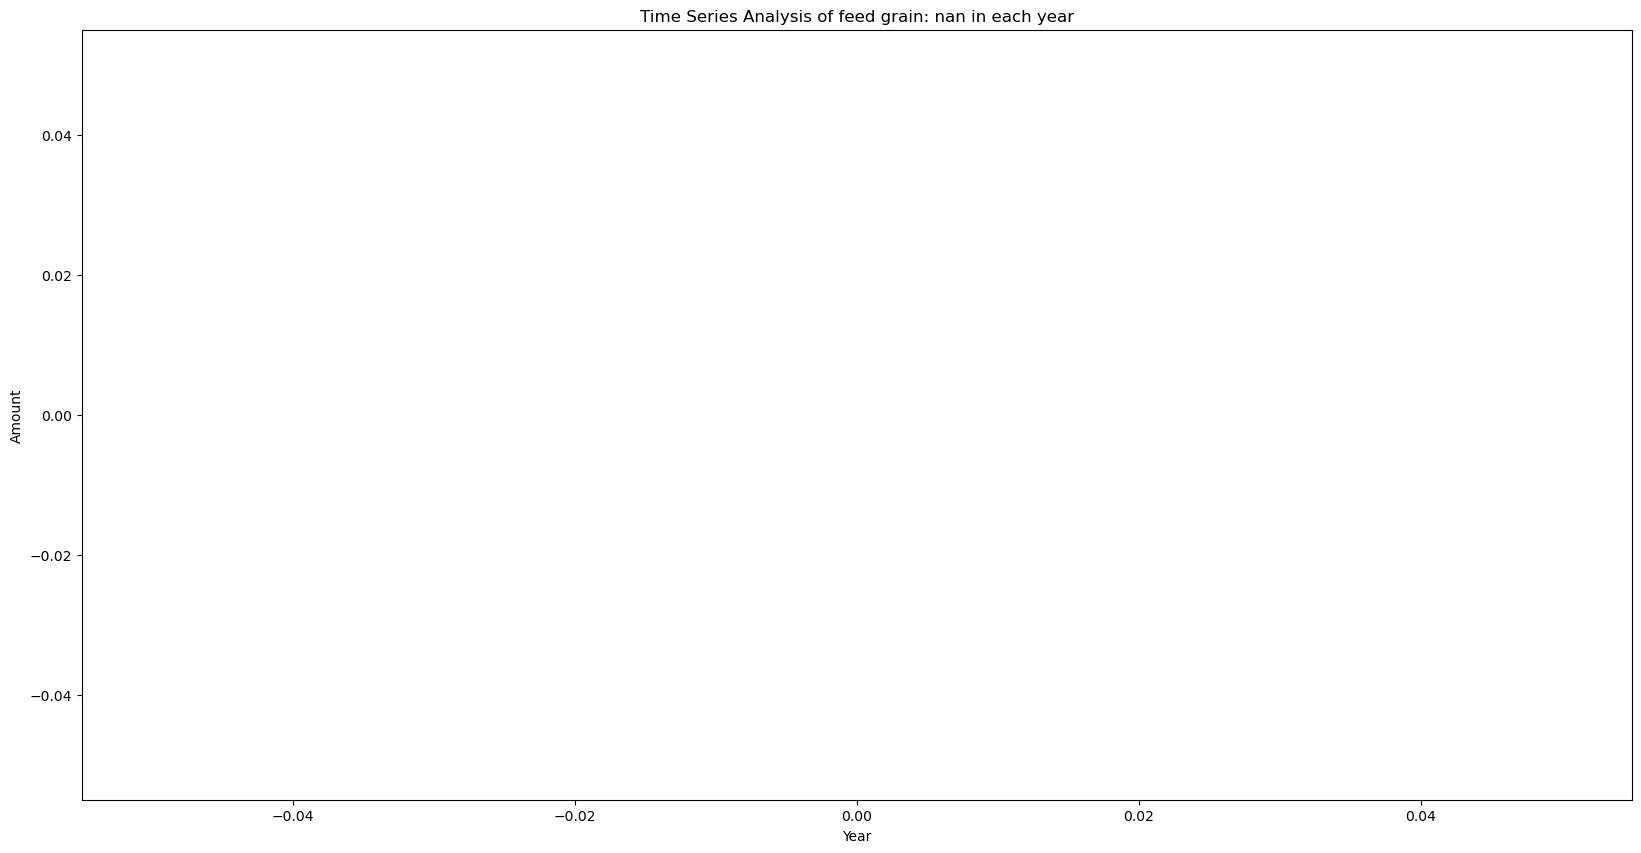

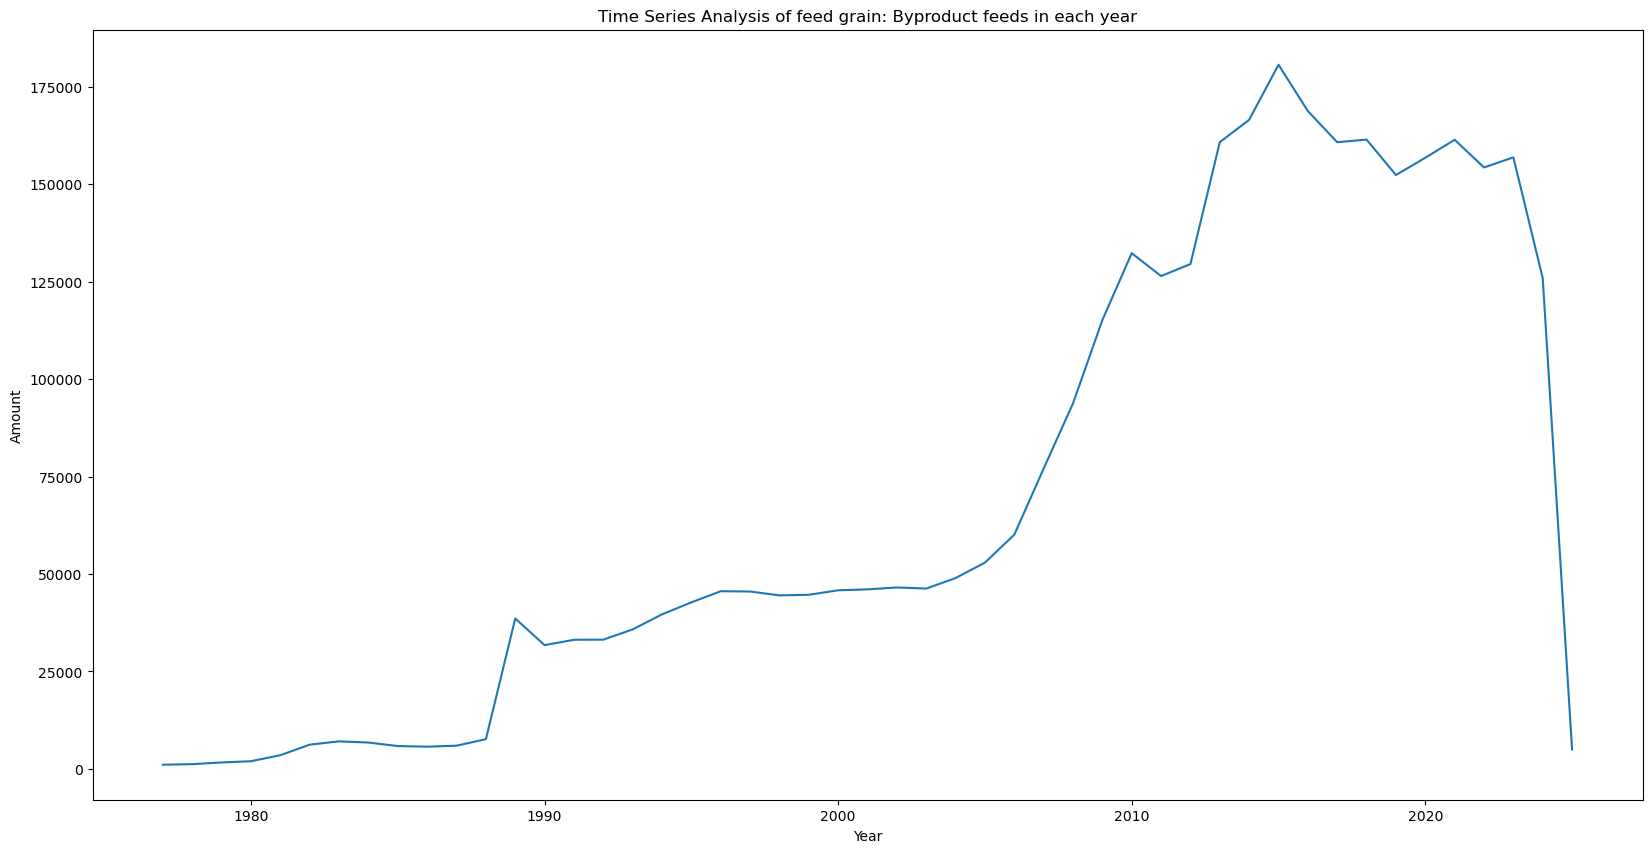

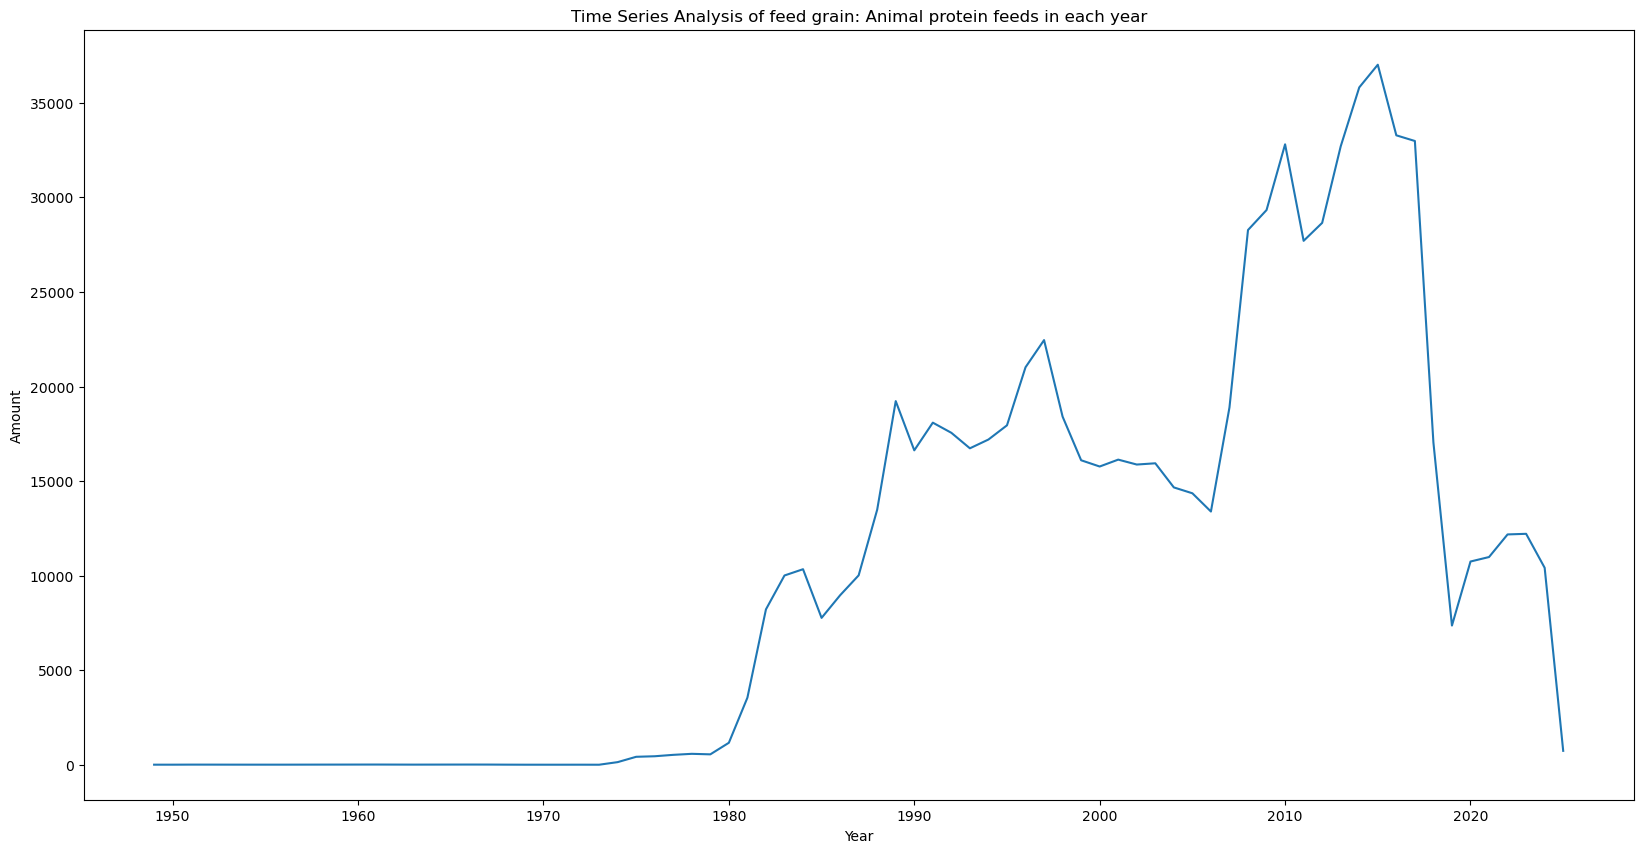

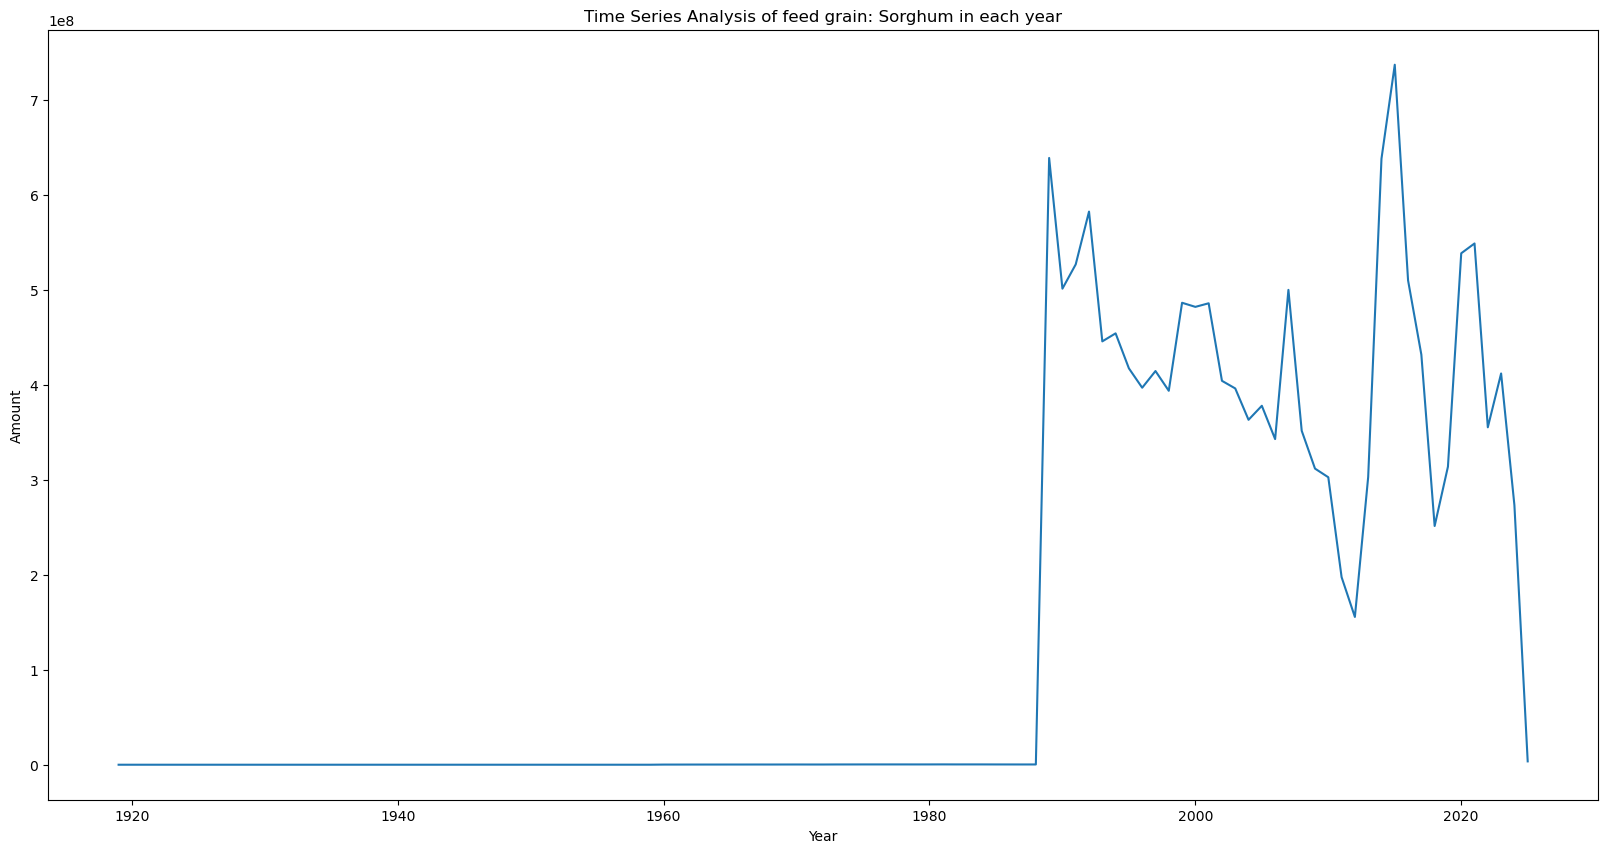

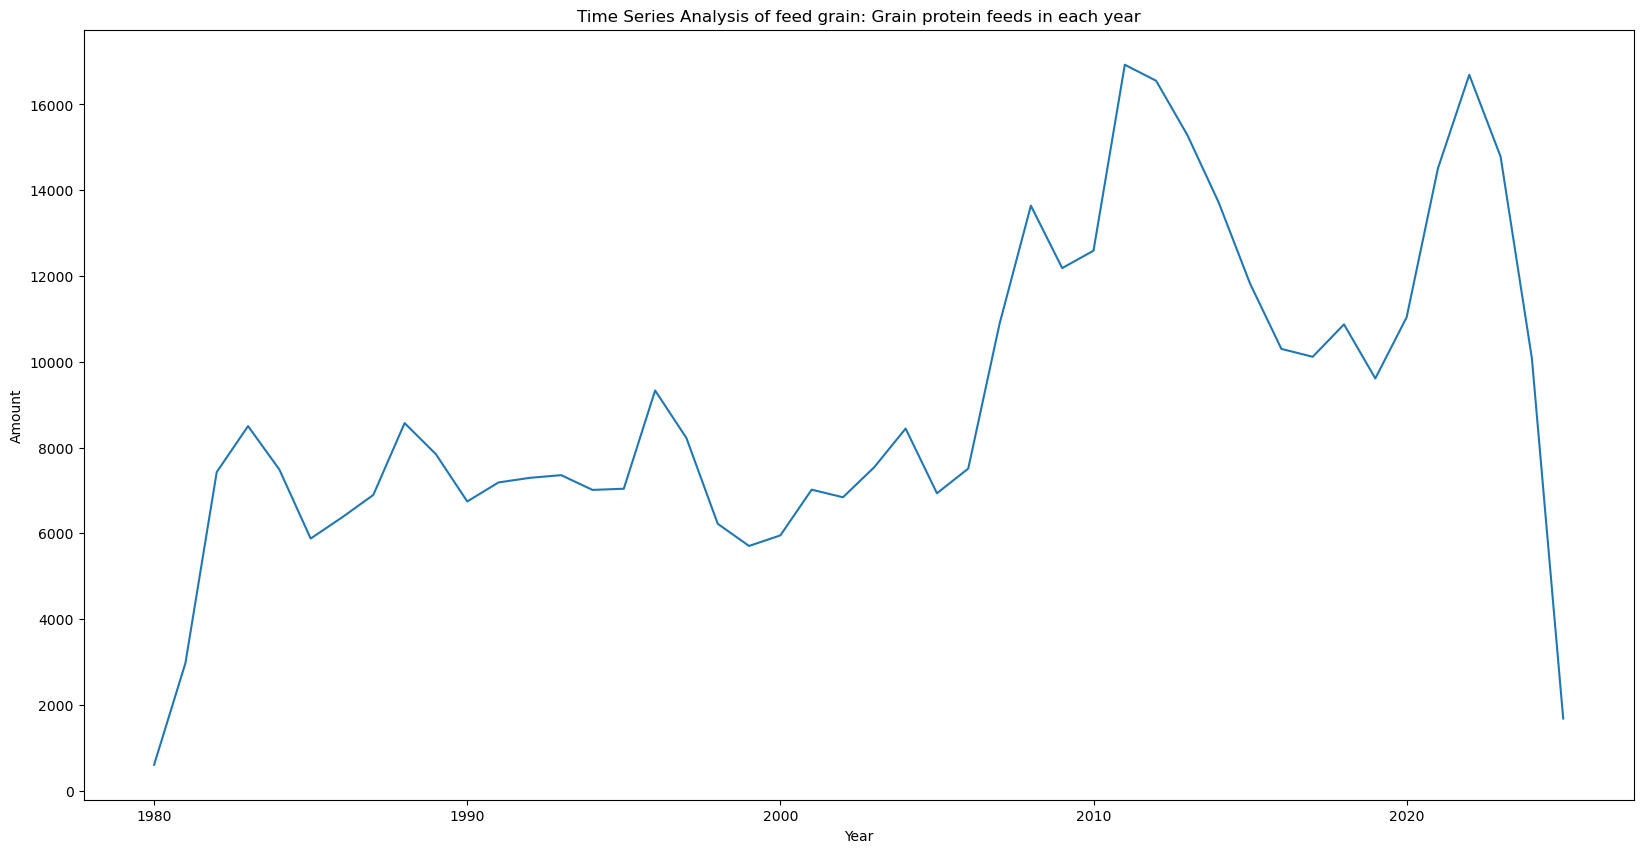

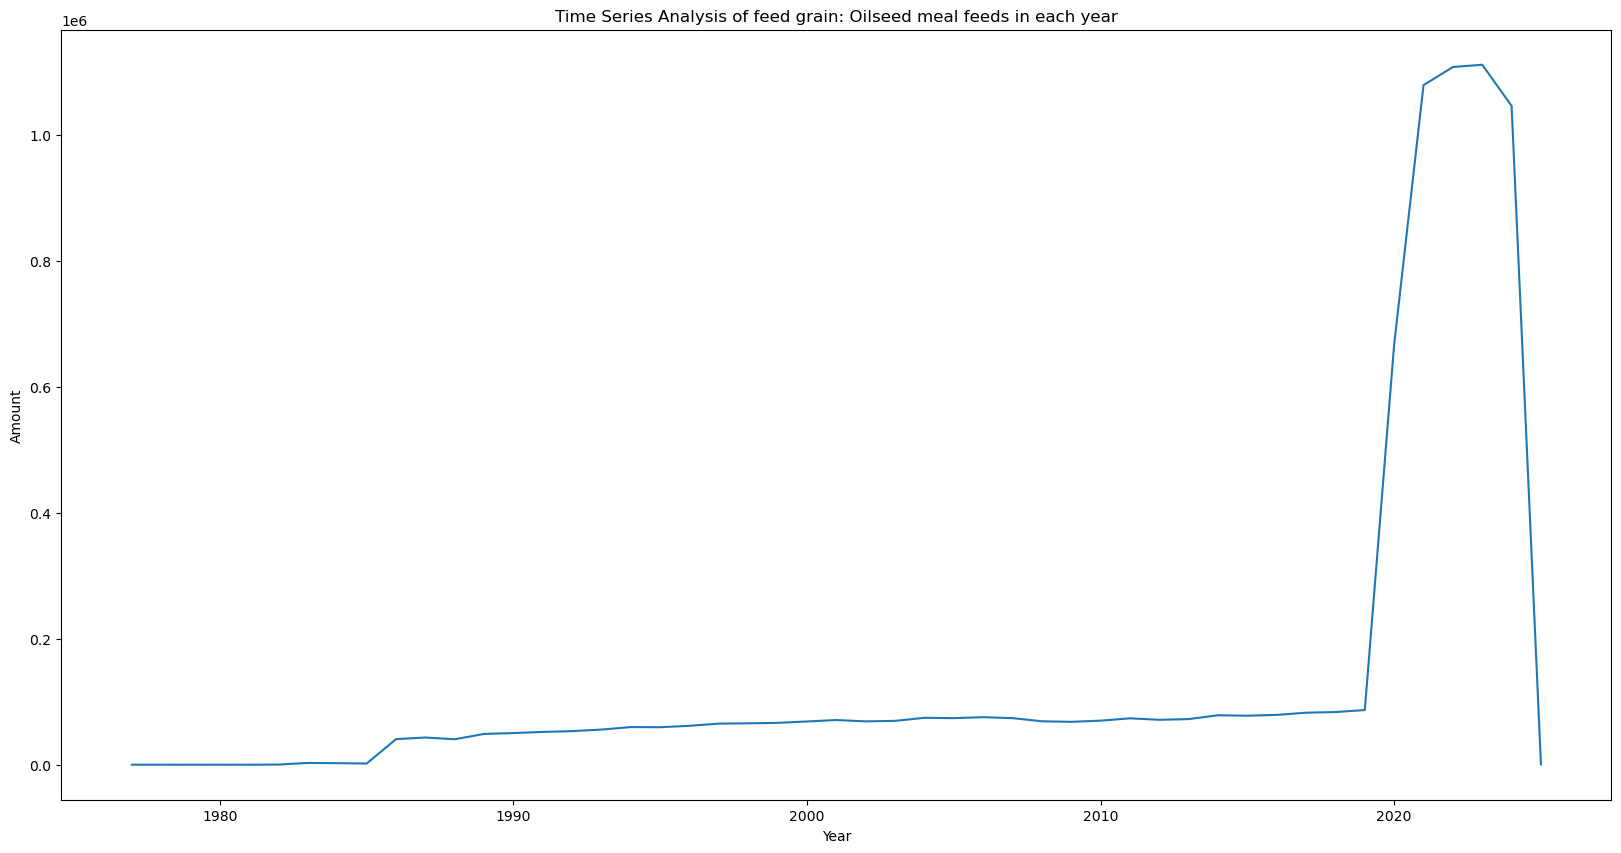

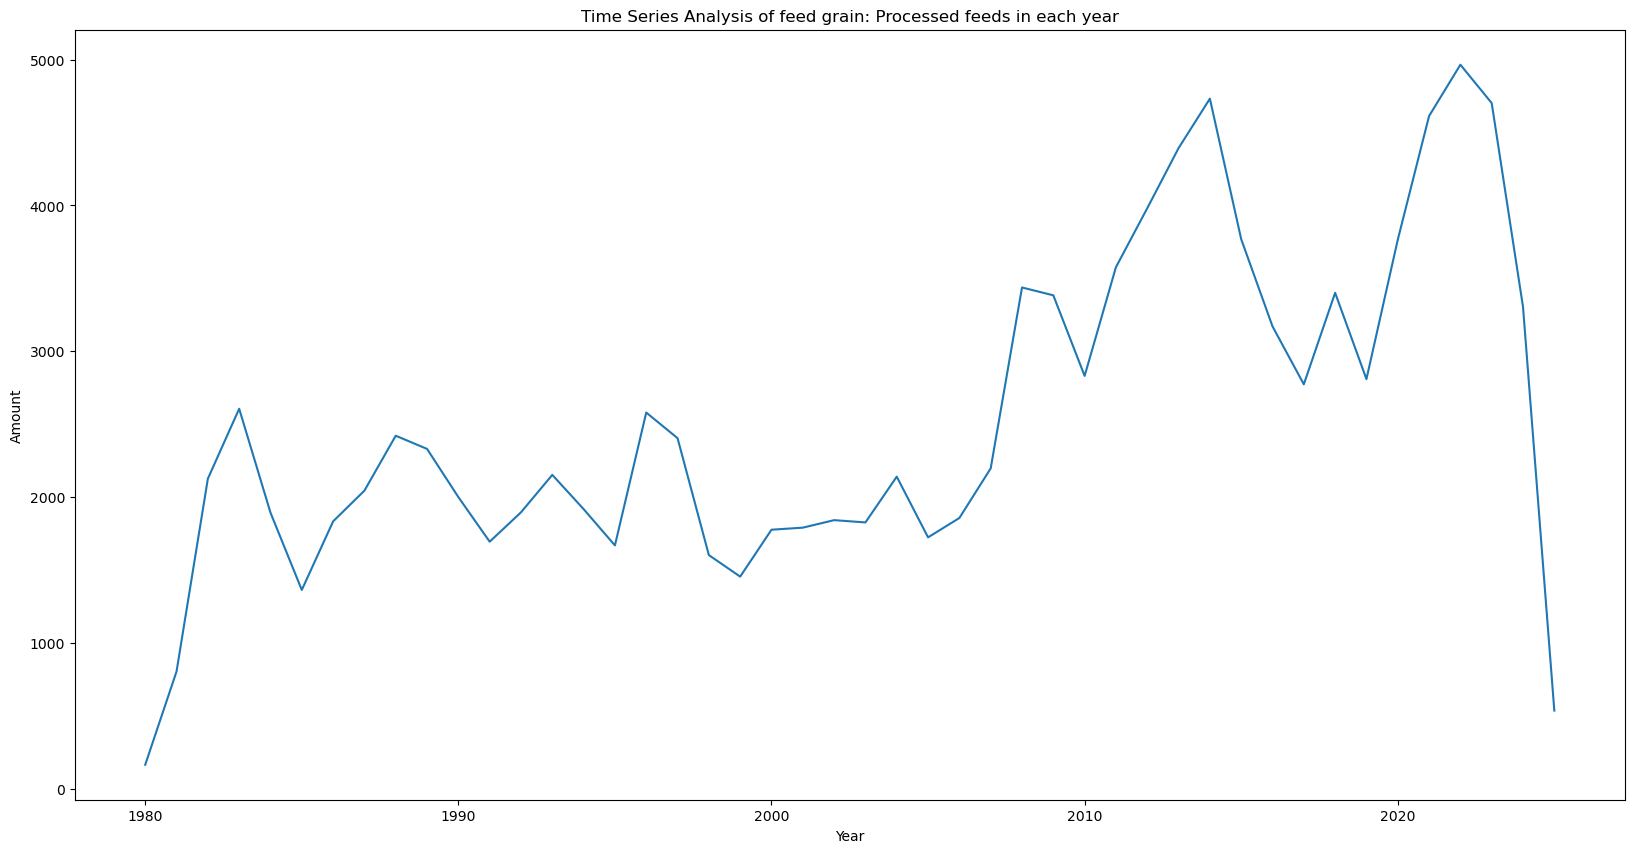

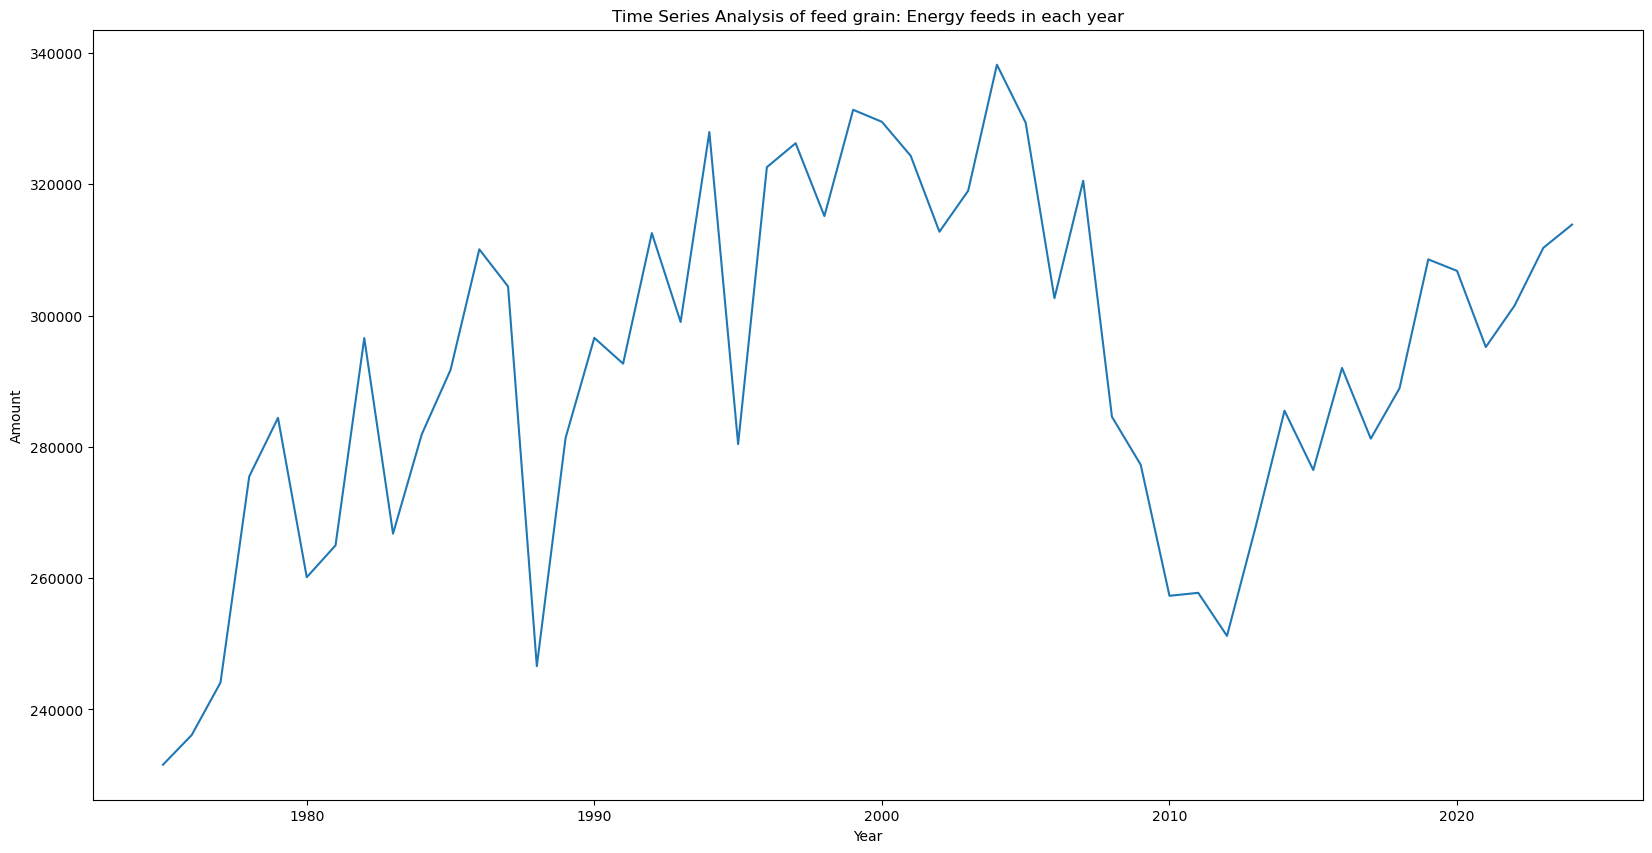

In [ ]:
# Ensure the 'Amount' is numeric
final_combined_df['Amount'] = pd.to_numeric(final_combined_df['Amount'], errors='coerce')

# Create time-series analysis of amount for each unique value in the 'SC_GroupCommod_Desc' column vs. year
for commodity in final_combined_df['SC_GroupCommod_Desc'].unique():
    commodity_df = final_combined_df[final_combined_df['SC_GroupCommod_Desc'] == commodity]
    commodity_df.groupby(year)['Amount'].sum().plot(title=commodity, figsize=(20, 10))
    plt.xlabel('Year')
    plt.ylabel('Amount')
    plt.title(f"Time Series Analysis of feed grain: {commodity} in each year")
    plt.show()